In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
import ydata_profiling as pp

# Modele
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn import tree
   
from sklearn.linear_model import Lasso
 
from sklearn.preprocessing import PolynomialFeatures
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import seaborn as sns

# Optymalizacja modeli
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

import warnings
warnings.filterwarnings("ignore")

In [2]:
valid_part = 0.3
train0 = pd.read_csv('vehicles.csv')
train0.head(50)

id                                                url  \
0   7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1   7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2   7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3   7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4   7210384030  https://greensboro.craigslist.org/cto/d/trinit...   
5   7222379453  https://hudsonvalley.craigslist.org/cto/d/west...   
6   7221952215  https://hudsonvalley.craigslist.org/cto/d/west...   
7   7220195662  https://hudsonvalley.craigslist.org/cto/d/poug...   
8   7209064557  https://medford.craigslist.org/cto/d/grants-pa...   
9   7219485069  https://erie.craigslist.org/cto/d/erie-2012-su...   
10  7218893038  https://elpaso.craigslist.org/ctd/d/el-paso-20...   
11  7218325704  https://elpaso.craigslist.org/ctd/d/el-paso-20...   
12  7217788283  https://elpaso.craigslist.org/ctd/d/el-paso-20...   
13  7217147606  https://elpaso.craigslist.org/ctd/d/el-paso-20...   
14  7209027818  https://elpaso.craigslist.org/ctd/d/el-paso-20...   
15  7223509794  https://bellingham.craigslist.org/ctd/d/bellin...   
16  7222753076  https://bellingham.craigslist.org/ctd/d/bellin...   
17  7222206015  https://bellingham.craigslist.org/ctd/d/bellin...   
18  7220030122  https://bellingham.craigslist.org/ctd/d/bellin...   
19  7218423006  https://bellingham.craigslist.org/ctd/d/bellin...   
20  7216672204  https://bellingham.craigslist.org/ctd/d/bellin...   
21  7215617048  https://bellingham.craigslist.org/ctd/d/bellin...   
22  7213839225  https://bellingham.craigslist.org/ctd/d/bellin...   
23  7208549803  https://bellingham.craigslist.org/ctd/d/bellin...   
24  7213843538  https://skagit.craigslist.org/ctd/d/bellingham...   
25  7212631321  https://skagit.craigslist.org/ctd/d/bellingham...   
26  7219973522  https://lacrosse.craigslist.org/cto/d/la-cross...   
27  7316814884  https://auburn.craigslist.org/ctd/d/auburn-uni...   
28  7316814758  https://auburn.craigslist.org/ctd/d/auburn-uni...   
29  7316814989  https://auburn.craigslist.org/ctd/d/auburn-uni...   
30  7316743432  https://auburn.craigslist.org/ctd/d/auburn-uni...   
31  7316356412  https://auburn.craigslist.org/cto/d/auburn-uni...   
32  7316343444  https://auburn.craigslist.org/ctd/d/auburn-uni...   
33  7316304717  https://auburn.craigslist.org/ctd/d/auburn-uni...   
34  7316285779  https://auburn.craigslist.org/cto/d/auburn-201...   
35  7316257769  https://auburn.craigslist.org/ctd/d/auburn-uni...   
36  7316133914  https://auburn.craigslist.org/ctd/d/auburn-uni...   
37  7316130053  https://auburn.craigslist.org/cto/d/opelika-19...   
38  7315816316  https://auburn.craigslist.org/ctd/d/auburn-uni...   
39  7315770394  https://auburn.craigslist.org/ctd/d/auburn-uni...   
40  7315756348  https://auburn.craigslist.org/ctd/d/auburn-uni...   
41  7315715960  https://auburn.craigslist.org/ctd/d/auburn-uni...   
42  7315379459  https://auburn.craigslist.org/ctd/d/auburn-uni...   
43  7315275975  https://auburn.craigslist.org/ctd/d/auburn-uni...   
44  7315275942  https://auburn.craigslist.org/ctd/d/auburn-uni...   
45  7315270785  https://auburn.craigslist.org/ctd/d/auburn-uni...   
46  7315039307  https://auburn.craigslist.org/ctd/d/auburn-999...   
47  7314910156  https://auburn.craigslist.org/ctd/d/auburn-uni...   
48  7314854462  https://auburn.craigslist.org/ctd/d/auburn-uni...   
49  7314811916  https://auburn.craigslist.org/ctd/d/auburn-uni...   

                    region                           region_url  price  \
0                 prescott      https://prescott.craigslist.org   6000   
1             fayetteville         https://fayar.craigslist.org  11900   
2             florida keys          https://keys.craigslist.org  21000   
3   worcester / central MA     https://worcester.craigslist.org   1500   
4               greensboro    https://greensboro.craigslist.org   4900   
5            hudson valley  https://hudsonvalley

In [3]:
drop_columns = ['url', 'region_url', 'region', 'manufacturer', 'model', 'lat', 'long', 'posting_date', 'state', 'county', 'size', 'description', 'title_status', 'VIN', 'image_url']
train0 = train0.drop(columns = drop_columns)
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   transmission  424324 non-null  object 
 8   drive         296313 non-null  object 
 9   type          334022 non-null  object 
 10  paint_color   296677 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 35.8+ MB


In [4]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   transmission  424324 non-null  object 
 8   drive         296313 non-null  object 
 9   type          334022 non-null  object 
 10  paint_color   296677 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 35.8+ MB


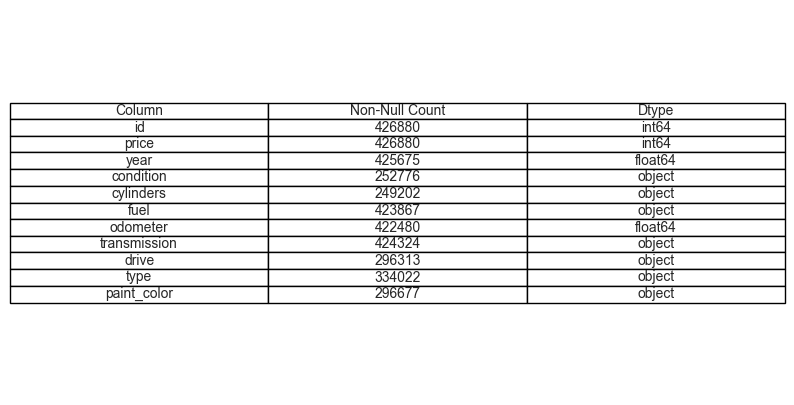

In [5]:
# Create a DataFrame summarizing df.info()
info_df = pd.DataFrame({
    "Column": train0.columns,
    "Non-Null Count": train0.notnull().sum(),
    "Dtype": train0.dtypes
}).reset_index(drop=True)


fig, ax = plt.subplots(figsize=(10, 5))  # Set appropriate size based on your DataFrame
ax.axis('tight')
ax.axis('off')
ax.table(cellText=info_df.values, colLabels=info_df.columns, cellLoc = 'center', loc='center')

plt.show()

In [6]:
train0 = train0.dropna()
train0.head(5)
train0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122262 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            122262 non-null  int64  
 1   price         122262 non-null  int64  
 2   year          122262 non-null  float64
 3   condition     122262 non-null  object 
 4   cylinders     122262 non-null  object 
 5   fuel          122262 non-null  object 
 6   odometer      122262 non-null  float64
 7   transmission  122262 non-null  object 
 8   drive         122262 non-null  object 
 9   type          122262 non-null  object 
 10  paint_color   122262 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 11.2+ MB


In [7]:
train0['drive'].unique()

array(['rwd', '4wd', 'fwd'], dtype=object)

In [8]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = train0.columns.values.tolist()
for col in features:
    if train0[col].dtype in numerics: continue
    categorical_columns.append(col)

for col in categorical_columns:
    if col in train0.columns:
        le = LabelEncoder()
        le.fit(list(train0[col].astype(str).values))
        train0[col] = le.transform(list(train0[col].astype(str).values))
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)

{'excellent': 0, 'fair': 1, 'good': 2, 'like new': 3, 'new': 4, 'salvage': 5}
{'10 cylinders': 0, '12 cylinders': 1, '3 cylinders': 2, '4 cylinders': 3, '5 cylinders': 4, '6 cylinders': 5, '8 cylinders': 6, 'other': 7}
{'diesel': 0, 'electric': 1, 'gas': 2, 'hybrid': 3, 'other': 4}
{'automatic': 0, 'manual': 1, 'other': 2}
{'4wd': 0, 'fwd': 1, 'rwd': 2}
{'SUV': 0, 'bus': 1, 'convertible': 2, 'coupe': 3, 'hatchback': 4, 'mini-van': 5, 'offroad': 6, 'other': 7, 'pickup': 8, 'sedan': 9, 'truck': 10, 'van': 11, 'wagon': 12}
{'black': 0, 'blue': 1, 'brown': 2, 'custom': 3, 'green': 4, 'grey': 5, 'orange': 6, 'purple': 7, 'red': 8, 'silver': 9, 'white': 10, 'yellow': 11}


In [9]:
train0.head(10)

id  price    year  condition  cylinders  fuel  odometer  \
31  7316356412  15000  2013.0          0          5     2  128000.0   
32  7316343444  27990  2012.0          2          6     2   68696.0   
33  7316304717  34590  2016.0          2          5     2   29499.0   
34  7316285779  35000  2019.0          0          5     2   43000.0   
35  7316257769  29990  2016.0          2          5     2   17302.0   
36  7316133914  38590  2011.0          2          6     2   30237.0   
38  7315816316  32990  2017.0          2          5     2   30041.0   
42  7315379459  37990  2016.0          2          6     2    9704.0   
45  7315270785  27990  2018.0          2          5     2   37332.0   
55  7314560853  19900  2004.0          2          6     0   88000.0   

    transmission  drive  type  paint_color  
31             0      2    10            0  
32             2      0     8            0  
33             2      0     8            9  
34             0      0    10            5  
35             2      0     8            8  
36             2      2     7            8  
38             2      0     7            9  
42             2      2     3            8  
45             2      0     8            9  
55             0      0     8            1

In [10]:
# Korelacja cen z innymi cechami
correlation_matrix = train0.corr()
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)

# Wyświetlenie korelacji z ceną
correlation_with_price

price           1.000000
cylinders       0.004441
paint_color     0.003068
type            0.002030
odometer        0.000609
year           -0.001148
transmission   -0.001298
condition      -0.001793
drive          -0.002004
fuel           -0.002547
id             -0.003888
Name: price, dtype: float64

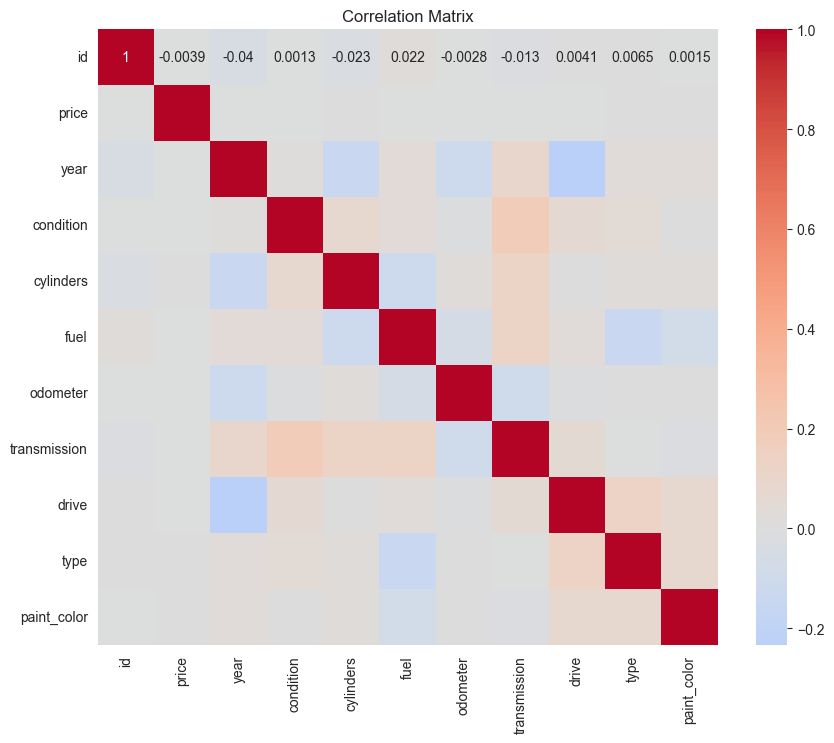

In [11]:
# Wykres korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [12]:
train0['year'] = (train0['year']-1900).astype(int)
train0['odometer'] = train0['odometer'].astype(int)
train0.head(10)

id  price  year  condition  cylinders  fuel  odometer  \
31  7316356412  15000   113          0          5     2    128000   
32  7316343444  27990   112          2          6     2     68696   
33  7316304717  34590   116          2          5     2     29499   
34  7316285779  35000   119          0          5     2     43000   
35  7316257769  29990   116          2          5     2     17302   
36  7316133914  38590   111          2          6     2     30237   
38  7315816316  32990   117          2          5     2     30041   
42  7315379459  37990   116          2          6     2      9704   
45  7315270785  27990   118          2          5     2     37332   
55  7314560853  19900   104          2          6     0     88000   

    transmission  drive  type  paint_color  
31             0      2    10            0  
32             2      0     8            0  
33             2      0     8            9  
34             0      0    10            5  
35             2      0     8            8  
36             2      2     7            8  
38             2      0     7            9  
42             2      2     3            8  
45             2      0     8            9  
55             0      0     8            1

In [13]:
train0 = train0[train0['price'] > 1000]
train0 = train0[train0['price'] < 40000]
 
train0 = train0[train0['year'] > 110]

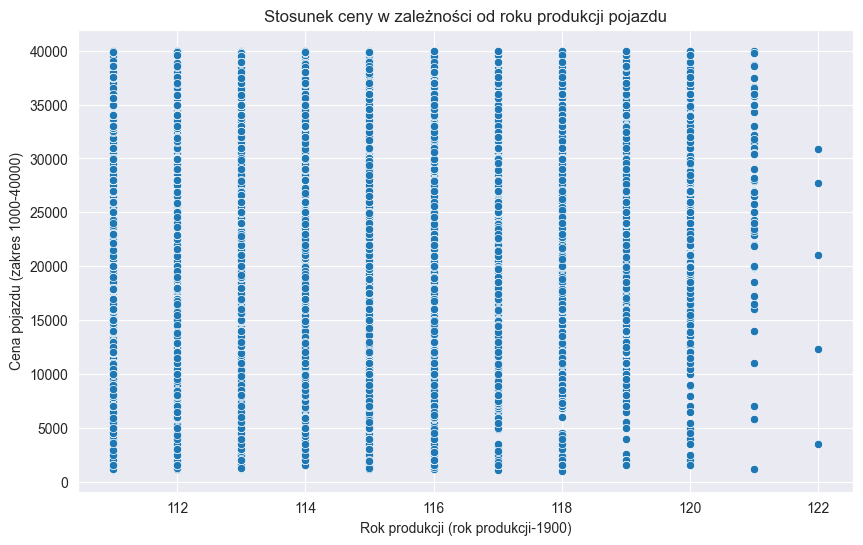

In [14]:
# Wykres punktowy ceny w zależności od rocznika
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=train0)
plt.title('Stosunek ceny w zależności od roku produkcji pojazdu')
plt.xlabel('Rok produkcji (rok produkcji-1900)')
plt.ylabel('Cena pojazdu (zakres 1000-40000)')
plt.show()


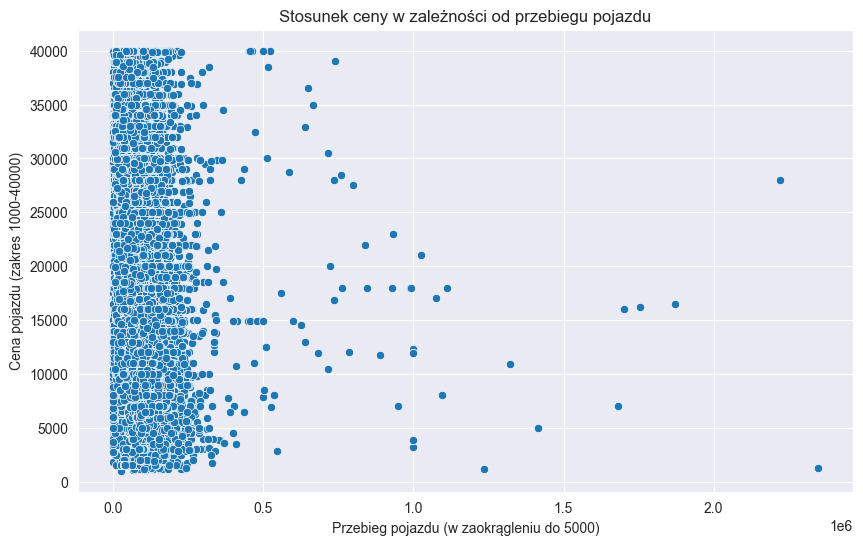

In [15]:
# Wykres punktowy ceny w zależności od przebiegu
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=train0)
plt.title('Stosunek ceny w zależności od przebiegu pojazdu')
plt.xlabel('Przebieg pojazdu (w zaokrągleniu do 5000)')
plt.ylabel('Cena pojazdu (zakres 1000-40000)')
plt.show()


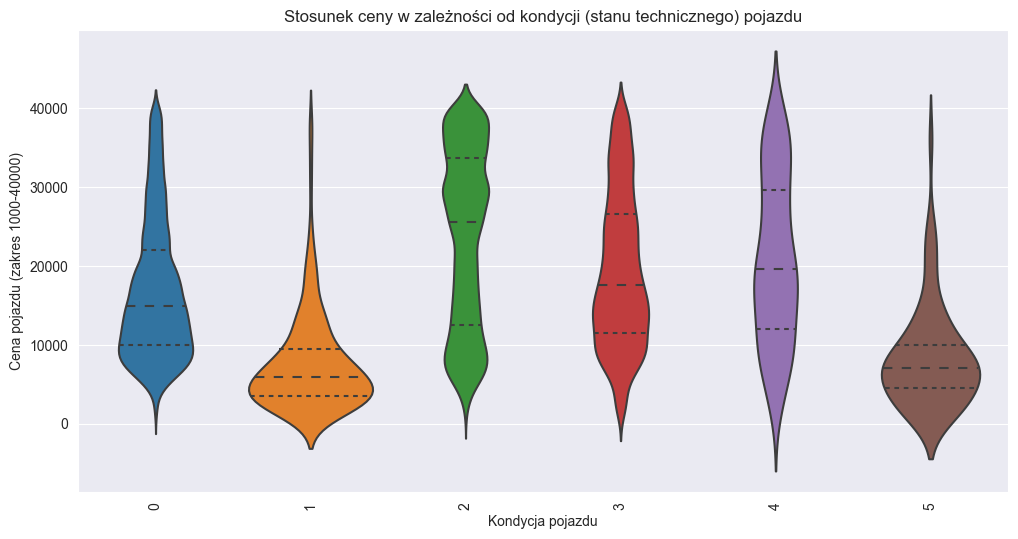

In [16]:
# Wykres skrzypcowy ceny w zależności od stanu
plt.figure(figsize=(12, 6))
sns.violinplot(x='condition', y='price', data=train0, inner='quartile')
plt.xticks(rotation=90)
plt.title('Stosunek ceny w zależności od kondycji (stanu technicznego) pojazdu')
plt.xlabel('Kondycja pojazdu')
plt.ylabel('Cena pojazdu (zakres 1000-40000)')
plt.show()


In [17]:
train0.head(10)

id  price  year  condition  cylinders  fuel  odometer  \
31  7316356412  15000   113          0          5     2    128000   
32  7316343444  27990   112          2          6     2     68696   
33  7316304717  34590   116          2          5     2     29499   
34  7316285779  35000   119          0          5     2     43000   
35  7316257769  29990   116          2          5     2     17302   
36  7316133914  38590   111          2          6     2     30237   
38  7315816316  32990   117          2          5     2     30041   
42  7315379459  37990   116          2          6     2      9704   
45  7315270785  27990   118          2          5     2     37332   
59  7313406529  14000   112          0          5     2     95000   

    transmission  drive  type  paint_color  
31             0      2    10            0  
32             2      0     8            0  
33             2      0     8            9  
34             0      0    10            5  
35             2      0     8            8  
36             2      2     7            8  
38             2      0     7            9  
42             2      2     3            8  
45             2      0     8            9  
59             0      1     5            9

In [18]:
train0['drive'].unique()
train0.head(10)
train0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57922 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   id            57922 non-null  int64
 1   price         57922 non-null  int64
 2   year          57922 non-null  int32
 3   condition     57922 non-null  int32
 4   cylinders     57922 non-null  int32
 5   fuel          57922 non-null  int32
 6   odometer      57922 non-null  int32
 7   transmission  57922 non-null  int32
 8   drive         57922 non-null  int32
 9   type          57922 non-null  int32
 10  paint_color   57922 non-null  int32
dtypes: int32(9), int64(2)
memory usage: 3.3 MB


In [19]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57922 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   id            57922 non-null  int64
 1   price         57922 non-null  int64
 2   year          57922 non-null  int32
 3   condition     57922 non-null  int32
 4   cylinders     57922 non-null  int32
 5   fuel          57922 non-null  int32
 6   odometer      57922 non-null  int32
 7   transmission  57922 non-null  int32
 8   drive         57922 non-null  int32
 9   type          57922 non-null  int32
 10  paint_color   57922 non-null  int32
dtypes: int32(9), int64(2)
memory usage: 3.3 MB


In [20]:
train0['price'].value_counts()

price
29990    952
33990    590
36990    566
37990    515
27990    511
        ... 
4195       1
21100      1
35785      1
28223      1
7945       1
Name: count, Length: 3517, dtype: int64

In [21]:
train0.corr()

id     price      year  condition  cylinders      fuel  \
id            1.000000 -0.008911 -0.047531   0.012857  -0.004055  0.023532   
price        -0.008911  1.000000  0.536605   0.214614   0.549304 -0.041964   
year         -0.047531  0.536605  1.000000   0.192908   0.021209  0.102496   
condition     0.012857  0.214614  0.192908   1.000000   0.126319  0.058777   
cylinders    -0.004055  0.549304  0.021209   0.126319   1.000000 -0.034469   
fuel          0.023532 -0.041964  0.102496   0.058777  -0.034469  1.000000   
odometer     -0.004639 -0.445357 -0.521792  -0.169972  -0.022922 -0.186407   
transmission  0.049568  0.511823  0.318319   0.293445   0.298294  0.143792   
drive        -0.007477 -0.070350  0.023638   0.064842  -0.032557 -0.011371   
type          0.032311  0.038705 -0.007015   0.054350   0.061117 -0.071465   
paint_color   0.011874  0.048631  0.005944   0.007915   0.026477 -0.074729   

              odometer  transmission     drive      type  paint_color  
id           -0.004639      0.049568 -0.007477  0.032311     0.011874  
price        -0.445357      0.511823 -0.070350  0.038705     0.048631  
year         -0.521792      0.318319  0.023638 -0.007015     0.005944  
condition    -0.169972      0.293445  0.064842  0.054350     0.007915  
cylinders    -0.022922      0.298294 -0.032557  0.061117     0.026477  
fuel         -0.186407      0.143792 -0.011371 -0.071465    -0.074729  
odometer      1.000000     -0.378994 -0.066400  0.037457     0.031396  
transmission -0.378994      1.000000  0.046243  0.004462    -0.029526  
drive        -0.066400      0.046243  1.000000  0.150071     0.089689  
type          0.037457      0.004462  0.150071  1.000000     0.084703  
paint_color   0.031396     -0.029526  0.089689  0.084703     1.000000

In [22]:
train0.describe()

id         price          year     condition     cylinders  \
count  5.792200e+04  57922.000000  57922.000000  57922.000000  57922.000000   
mean   7.311648e+09  19734.851939    114.744311      1.210749      4.446117   
std    4.259617e+06  10460.774647      2.558382      1.175934      1.250765   
min    7.301588e+09   1012.000000    111.000000      0.000000      0.000000   
25%    7.308511e+09  10800.000000    113.000000      0.000000      3.000000   
50%    7.312786e+09  17600.000000    115.000000      2.000000      5.000000   
75%    7.315249e+09  28590.000000    117.000000      2.000000      5.000000   
max    7.317097e+09  39999.000000    122.000000      5.000000      7.000000   

               fuel      odometer  transmission         drive          type  \
count  57922.000000  5.792200e+04  57922.000000  57922.000000  57922.000000   
mean       1.985826  8.409200e+04      0.388177      0.763389      6.116018   
std        0.504077  6.064869e+04      0.767629      0.756780      4.040066   
min        0.000000  0.000000e+00      0.000000      0.000000      0.000000   
25%        2.000000  3.962625e+04      0.000000      0.000000      2.000000   
50%        2.000000  8.039350e+04      0.000000      1.000000      8.000000   
75%        2.000000  1.172000e+05      0.000000      1.000000      9.000000   
max        4.000000  2.346897e+06      2.000000      2.000000     12.000000   

        paint_color  
count  57922.000000  
mean       5.678499  
std        4.096973  
min        0.000000  
25%        1.000000  
50%        8.000000  
75%       10.000000  
max       11.000000

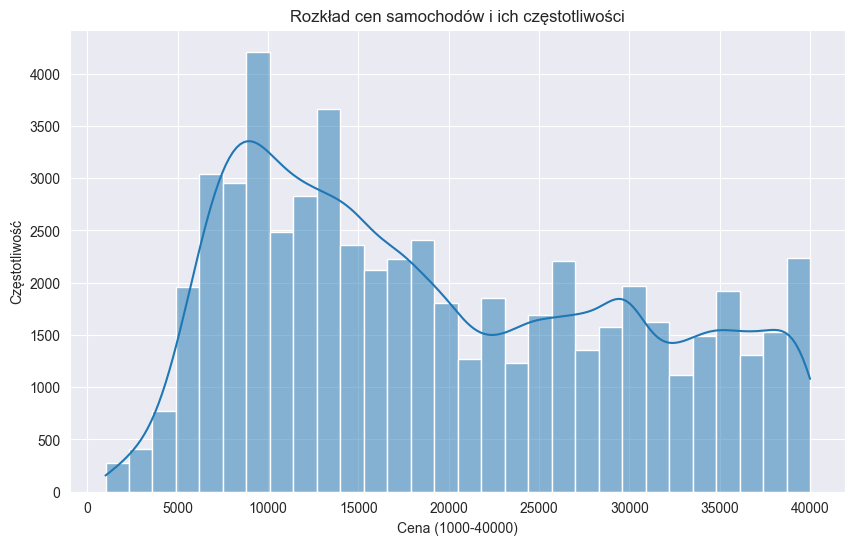

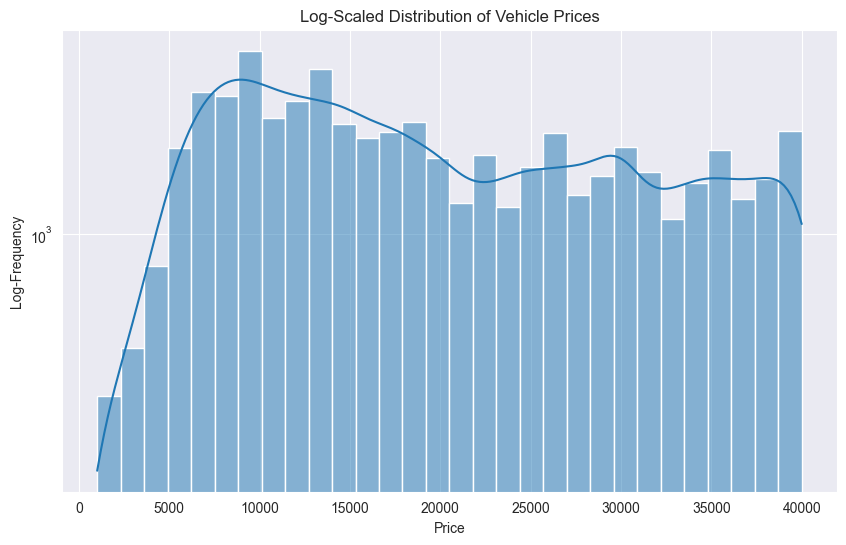

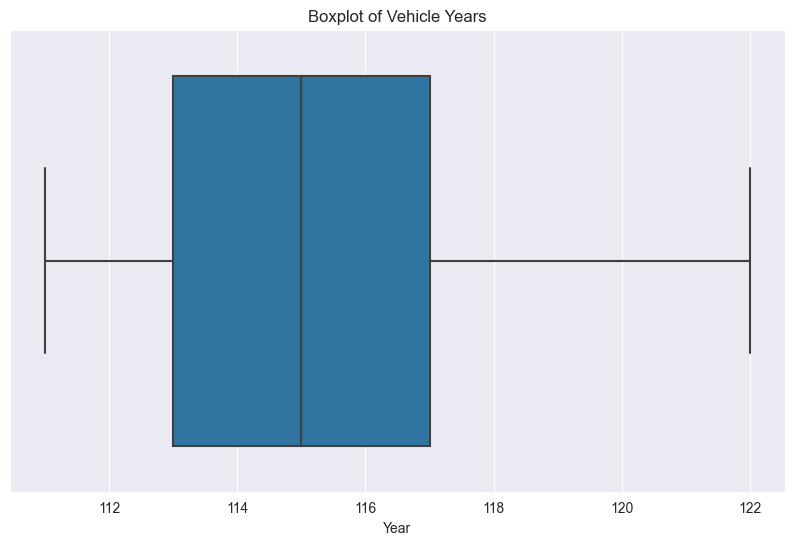

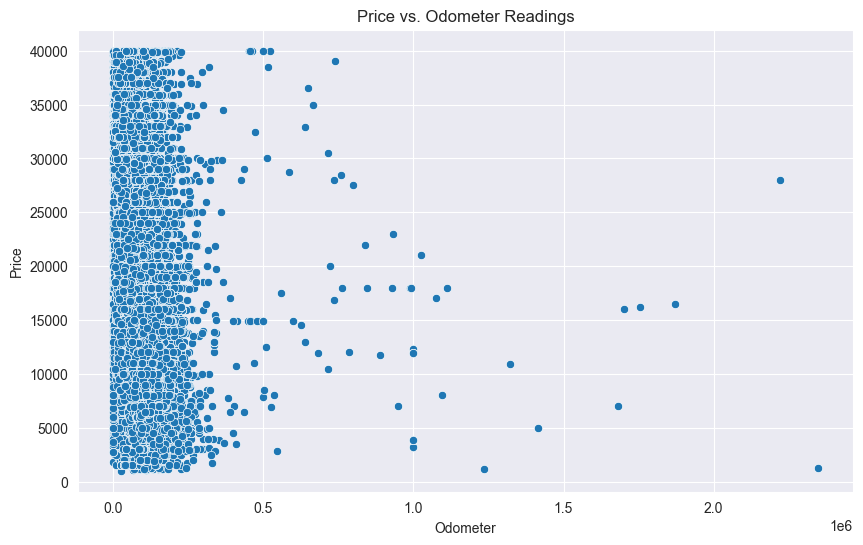

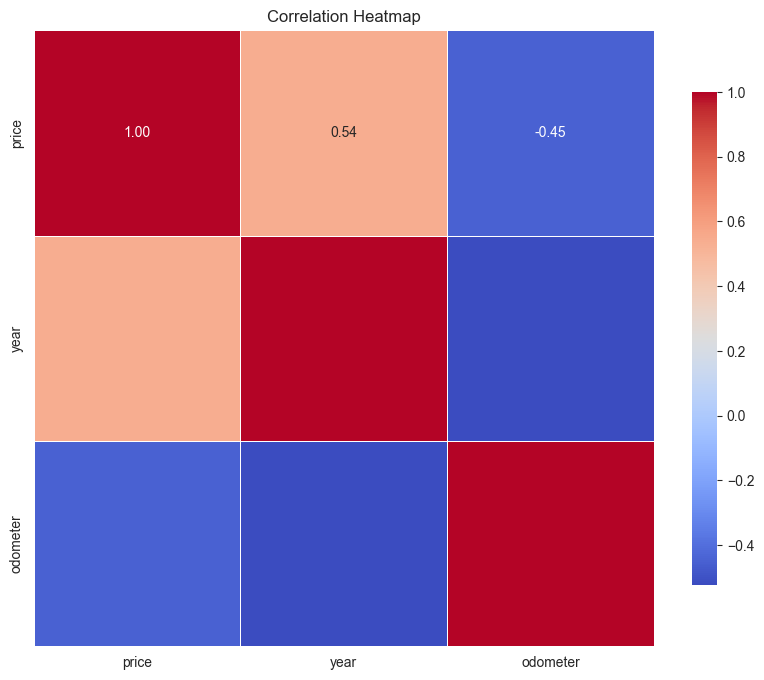

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(train0['price'], bins=30, kde=True)
plt.title('Rozkład cen samochodów i ich częstotliwości')
plt.xlabel('Cena (1000-40000)')
plt.ylabel('Częstotliwość')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(train0['price'], bins=30, kde=True, log_scale=(False, True))  # False for x-axis, True for y-axis
plt.title('Log-Scaled Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Log-Frequency')
plt.show()


# Boxplot of vehicle year
plt.figure(figsize=(10, 6))
sns.boxplot(x=train0['year'])
plt.title('Boxplot of Vehicle Years')
plt.xlabel('Year')
plt.show()

# Scatter plot of price vs odometer
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=train0)
plt.title('Price vs. Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train0[['price', 'year', 'odometer']].corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [24]:
pp.ProfileReport(train0)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
target_name = 'price'
train_target0 = train0[target_name]
train0 = train0.drop([target_name], axis=1)

In [26]:
train0, test0, train_target0, test_target0 = train_test_split(train0, train_target0, test_size=0.2, random_state=42)

In [27]:
train0b = train0
train_target0b = train_target0
trainb, testb, targetb, target_testb = train_test_split(train0b, train_target0b, test_size=valid_part, random_state=42)

In [28]:
scaler = StandardScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)

In [29]:
train0.head(3)

id      year  condition  cylinders      fuel  odometer  transmission  \
0  0.587878 -1.071381  -1.030525  -1.152358  0.029158  0.060028     -0.504307   
1 -0.581887 -0.289841   1.519347   0.445655  0.029158 -0.246432     -0.504307   
2  0.294359 -0.680611  -1.030525  -1.152358  0.029158  0.819173     -0.504307   

      drive      type  paint_color  
0  0.313816  0.713297     1.055441  
1  0.313816 -0.276604    -0.898024  
2  0.313816  0.713297    -1.386390

In [30]:
len(train0)

46337

In [31]:
train, test, target, target_test = train_test_split(train0, train_target0, test_size=valid_part, random_state=42)

In [32]:
acc_train_r2 = []
acc_test_r2 = []
acc_train_d = []
acc_test_d = []
acc_train_rmse = []
acc_test_rmse = []

In [33]:
def acc_d(y_meas, y_pred):
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    return (mean_squared_error(y_meas, y_pred))**0.5

In [34]:
def acc_boosting_model(num,model,train,test,num_iteration=0):
    
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    if num_iteration > 0:
        ytrain = model.predict(train, num_iteration = num_iteration)  
        ytest = model.predict(test, num_iteration = num_iteration)
    else:
        ytrain = model.predict(train)  
        ytest = model.predict(test)

    print('target = ', targetb[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(targetb, ytrain) * 100, 2)
    print('acc(r2_score) dla train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(targetb, ytrain) * 100, 2)
    print('acc(relative error) dla train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(targetb, ytrain) * 100, 2)
    print('acc(rmse) dla train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_testb[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_testb, ytest) * 100, 2)
    print('acc(r2_score) dla test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_testb, ytest) * 100, 2)
    print('acc(relative error) dla test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_testb, ytest) * 100, 2)
    print('acc(rmse) dla test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [35]:
def acc_model(num,model,train,test):

    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    ytrain = model.predict(train)  
    ytest = model.predict(test)

    print('target = ', target[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(target, ytrain) * 100, 2)
    print('acc(r2_score) dla train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(target, ytrain) * 100, 2)
    print('acc(relative error) dla train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(target, ytrain) * 100, 2)
    print('acc(rmse) dla train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_test[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_test, ytest) * 100, 2)
    print('acc(r2_score) dla test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_test, ytest) * 100, 2)
    print('acc(relative error) dla test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_test, ytest) * 100, 2)
    print('acc(rmse) dla test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

## MODELE

In [36]:
linreg = LinearRegression()
linreg.fit(train, target)
acc_model(0,linreg,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [28044.63576924 17123.90762257 20715.31162174 19312.73754493
 10177.43836643]
acc(r2_score) dla train = 66.77
acc(relative error) dla train = 22.72
acc(rmse) dla train = 600696.9
target_test = [19900 14998  8500 16900 17990]
ytest = [16326.60484846 18454.79963334 14879.23158578 18497.17614565
 22513.28265478]
acc(r2_score) dla test = 64.36
acc(relative error) dla test = 23.13
acc(rmse) dla test = 627170.62


In [37]:
lasso = Lasso(alpha=0.1)
lasso.fit(train, target)
acc_model(12,lasso,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [28044.42476282 17123.76023235 20715.051031   19312.63115473
 10177.46904482]
acc(r2_score) dla train = 66.77
acc(relative error) dla train = 22.72
acc(rmse) dla train = 600696.9
target_test = [19900 14998  8500 16900 17990]
ytest = [16326.46110452 18455.28063562 14879.46200001 18497.5357414
 22513.19159989]
acc(r2_score) dla test = 64.36
acc(relative error) dla test = 23.13
acc(rmse) dla test = 627169.4


In [38]:
svr = SVR()
svr.fit(train, target)
acc_model(3,svr,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [19718.89772878 17495.2916201  18435.23912024 17373.27846476
 15224.49632627]
acc(r2_score) dla train = 18.0
acc(relative error) dla train = 39.71
acc(rmse) dla train = 943668.66
target_test = [19900 14998  8500 16900 17990]
ytest = [17475.49381289 17889.37727034 16614.94350273 17713.54111078
 17962.36085812]
acc(r2_score) dla test = 17.8
acc(relative error) dla test = 40.12
acc(rmse) dla test = 952444.69


In [39]:
linear_svr = LinearSVR()
linear_svr.fit(train, target)
acc_model(4,linear_svr,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [23017.13265485 13855.7126729  17295.84899301 14957.38914262
  7915.24115684]
acc(r2_score) dla train = 48.32
acc(relative error) dla train = 27.93
acc(rmse) dla train = 749206.24
target_test = [19900 14998  8500 16900 17990]
ytest = [13333.45430957 13841.92846618 12460.00954226 14784.71495215
 17497.36339416]
acc(r2_score) dla test = 45.3
acc(relative error) dla test = 28.4
acc(rmse) dla test = 776946.53


In [40]:
sgd = SGDRegressor()
sgd.fit(train, target)
acc_model(2,sgd,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [28518.24254043 16652.81716901 20499.44952897 18988.02869578
 10476.82980646]
acc(r2_score) dla train = 66.66
acc(relative error) dla train = 22.75
acc(rmse) dla train = 601705.28
target_test = [19900 14998  8500 16900 17990]
ytest = [16541.80960665 18097.14877557 14855.57014951 17804.9298617
 22128.61389136]
acc(r2_score) dla test = 64.2
acc(relative error) dla test = 23.17
acc(rmse) dla test = 628533.49


In [41]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(train, target)
acc_model(5,decision_tree,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [20990. 14000. 20000. 10995. 12990.]
acc(r2_score) dla train = 100.0
acc(relative error) dla train = 0.0
acc(rmse) dla train = 0.0
target_test = [19900 14998  8500 16900 17990]
ytest = [19900. 14998. 11750. 16900. 17990.]
acc(r2_score) dla test = 77.62
acc(relative error) dla test = 14.23
acc(rmse) dla test = 496957.75


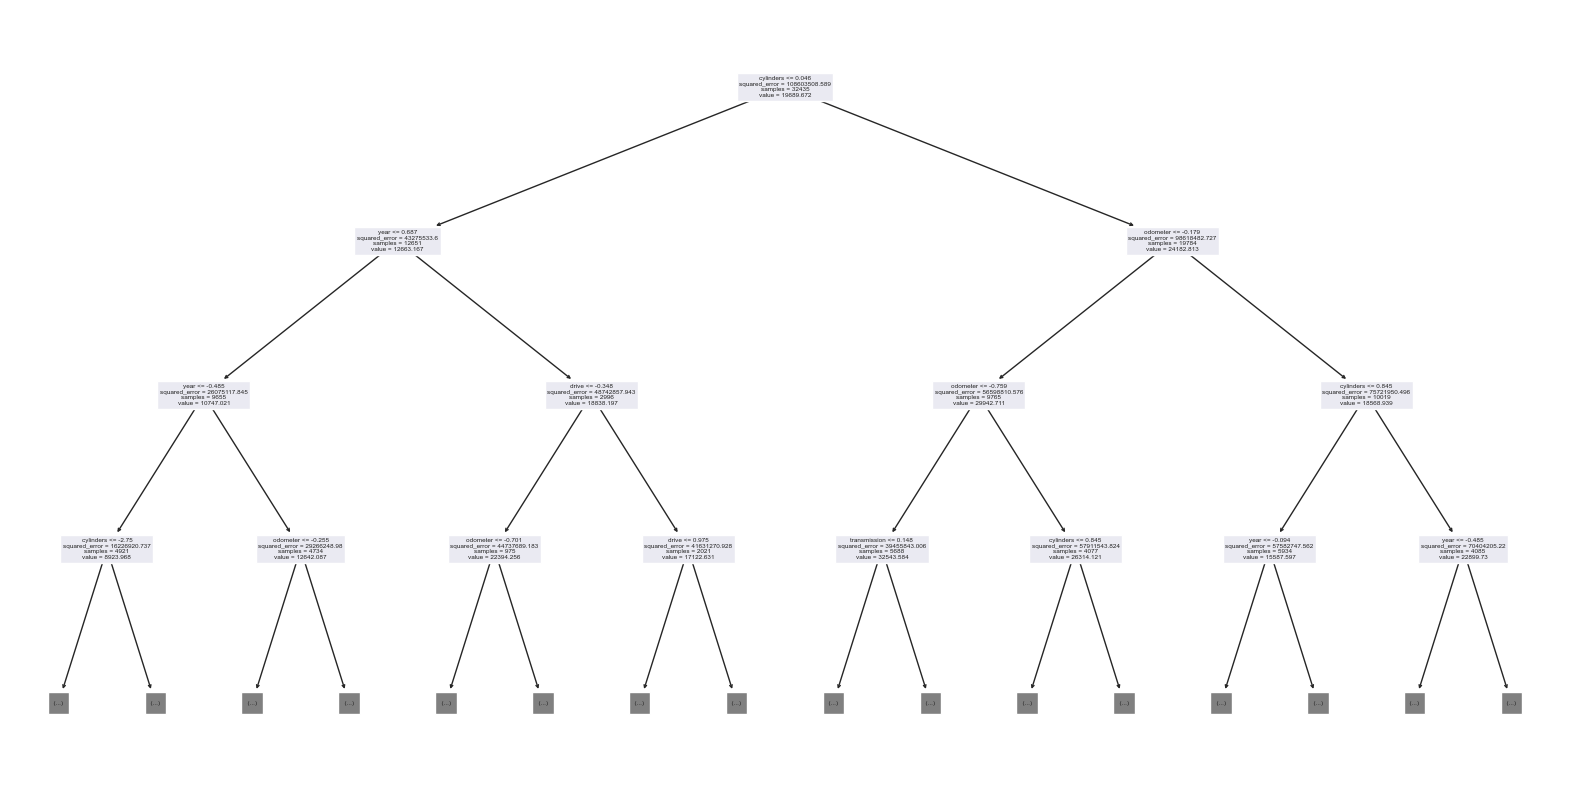

In [42]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=False, feature_names=train.columns, max_depth=3)
plt.show()


In [107]:
random_forest = RandomForestRegressor()
random_forest.fit(train, target)
acc_model(6,random_forest,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [21000.1  14252.76 19244.33 12263.22 12321.29]
acc(r2_score) dla train = 98.2
acc(relative error) dla train = 4.3
acc(rmse) dla train = 139912.21
target_test = [19900 14998  8500 16900 17990]
ytest = [19900.   15395.99 12696.63 15858.45 17046.18]
acc(r2_score) dla test = 87.92
acc(relative error) dla test = 11.33
acc(rmse) dla test = 365099.62


In [108]:
Xtrain, Xval, Ztrain, Zval = train_test_split(trainb, targetb, test_size=0.2, random_state=42)
train_set = lgb.Dataset(Xtrain, Ztrain)
valid_set = lgb.Dataset(Xval, Zval)

In [109]:
def hyperopt_gb_score(params):
    clf = GradientBoostingRegressor(**params)
    current_score = cross_val_score(clf, train, target, cv=10).mean()
    print(current_score, params)
    return current_score 
 
space_gb = {
            'n_estimators': hp.choice('n_estimators', range(100, 1000)),
            'max_depth': hp.choice('max_depth', np.arange(2, 10, dtype=int))            
        }
 
best = fmin(fn=hyperopt_gb_score, space=space_gb, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

0.8712067597384336                                                                                                     
{'max_depth': 7, 'n_estimators': 889}                                                                                  
0.8712884194135289                                                                                                     
{'max_depth': 9, 'n_estimators': 442}                                                                                  
0.8585724808956432                                                                                                     
{'max_depth': 5, 'n_estimators': 643}                                                                                  
0.8664677952021889                                                                                                     
{'max_depth': 6, 'n_estimators': 727}                                                                                  
0.8372734247427566                      

In [110]:
params = space_eval(space_gb, best)
params

{'max_depth': 3, 'n_estimators': 667}

In [111]:
gradient_boosting = GradientBoostingRegressor(**params)
gradient_boosting.fit(train, target)
acc_model(8,gradient_boosting,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [26863.98607179 13549.55946774 15406.0740419  14194.75193189
  8716.91692336]
acc(r2_score) dla train = 85.45
acc(relative error) dla train = 14.67
acc(rmse) dla train = 397486.91
target_test = [19900 14998  8500 16900 17990]
ytest = [18048.05853364 19258.67693149 12562.1496062  14138.2734406
 20581.3296912 ]
acc(r2_score) dla test = 84.71
acc(relative error) dla test = 15.07
acc(rmse) dla test = 410718.45


In [112]:
ridge = RidgeCV(cv=5)
ridge.fit(train, target)
acc_model(1,ridge,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [28044.08290718 17124.65547881 20715.96624305 19312.42985172
 10179.54901529]
acc(r2_score) dla train = 66.77
acc(relative error) dla train = 22.72
acc(rmse) dla train = 600696.94
target_test = [19900 14998  8500 16900 17990]
ytest = [16327.98975058 18454.87403187 14880.34456162 18497.45732638
 22512.10011438]
acc(r2_score) dla test = 64.36
acc(relative error) dla test = 23.13
acc(rmse) dla test = 627166.03


In [113]:
bagging = BaggingRegressor()
bagging.fit(train, target)
acc_model(9,bagging,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [20990.  14999.8 19199.5 16177.2 11357.8]
acc(r2_score) dla train = 97.49
acc(relative error) dla train = 4.8
acc(rmse) dla train = 165067.9
target_test = [19900 14998  8500 16900 17990]
ytest = [19900.  14998.  12338.7 16002.2 17892.1]
acc(r2_score) dla test = 86.84
acc(relative error) dla test = 11.9
acc(rmse) dla test = 381132.36


In [114]:
etr = ExtraTreesRegressor()
etr.fit(train, target)
acc_model(7,etr,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [20990. 14000. 20000. 10995. 12990.]
acc(r2_score) dla train = 100.0
acc(relative error) dla train = 0.0
acc(rmse) dla train = 591.55
target_test = [19900 14998  8500 16900 17990]
ytest = [19900.   14998.   13101.28 16900.   17990.  ]
acc(r2_score) dla test = 87.66
acc(relative error) dla test = 10.54
acc(rmse) dla test = 369095.41


In [115]:
Ada_Boost = AdaBoostRegressor()
Ada_Boost.fit(train, target)
acc_model(10,Ada_Boost,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [26461.87361726 17633.46706865 17128.76712711 19473.07425012
 11775.40875081]
acc(r2_score) dla train = 63.59
acc(relative error) dla train = 26.44
acc(rmse) dla train = 628869.01
target_test = [19900 14998  8500 16900 17990]
ytest = [20403.29689704 20854.43838686 19263.59781219 17128.76712711
 21774.45939825]
acc(r2_score) dla test = 63.68
acc(relative error) dla test = 26.61
acc(rmse) dla test = 633064.76


In [116]:
Voting_Reg = VotingRegressor(estimators=[('lin', linreg), ('ridge', ridge), ('sgd', sgd)])
Voting_Reg.fit(train, target)
acc_model(11,Voting_Reg,train,test)

target =  [20990 14000 20000 10995 12990]
ytrain =  [28010.13697513 17107.82873063 20677.9176814  19309.97440781
 10194.59908698]
acc(r2_score) dla train = 66.77
acc(relative error) dla train = 22.72
acc(rmse) dla train = 600712.26
target_test = [19900 14998  8500 16900 17990]
ytest = [16369.71980331 18451.29873862 14892.11251656 18501.00239156
 22520.80948846]
acc(r2_score) dla test = 64.36
acc(relative error) dla test = 23.14
acc(rmse) dla test = 627131.9


## POROWNANIE

In [118]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Regresja Grzbietowa', 'SGD Regressor', 'SVR', 
              'Linear SVR', 'Decision Tree', 'Random Forest', 'Extra Trees',  'Gradient Boosting',
              'Bagging Regressor', 'AdaBoostRegressor', 'VotingRegressor', 'Lasso'],
    
    'r2_train': acc_train_r2,
    'r2_test': acc_test_r2,
    'd_train': acc_train_d,
    'd_test': acc_test_d,
    'rmse_train': acc_train_rmse,
    'rmse_test': acc_test_rmse
                     })

In [119]:
pd.options.display.float_format = '{:,.2f}'.format

In [120]:
print('Dokladnosc przewidywania R2 - r2_test')
models.sort_values(by=['r2_test', 'r2_train'], ascending=False)

Dokladnosc przewidywania R2 - r2_test


Model  r2_train  r2_test  d_train  d_test  rmse_train  \
8     Gradient Boosting     98.20    87.92     4.30   11.33  139,912.21   
7           Extra Trees    100.00    87.66     0.00   10.54      591.55   
12                Lasso     97.49    86.84     4.80   11.90  165,067.90   
9     Bagging Regressor     85.45    84.71    14.67   15.07  397,486.91   
6         Random Forest    100.00    77.61     0.00   14.21        0.00   
0     Linear Regression     66.77    64.36    22.72   23.13  600,696.90   
1   Regresja Grzbietowa     66.77    64.36    22.72   23.13  600,696.94   
2         SGD Regressor     66.77    64.36    22.72   23.13  600,696.90   
11      VotingRegressor     66.77    64.36    22.72   23.14  600,712.26   
3                   SVR     66.61    63.81    22.68   23.11  602,212.83   
10    AdaBoostRegressor     63.59    63.68    26.44   26.61  628,869.01   
5         Decision Tree     48.32    45.30    27.93   28.40  749,179.23   
4            Linear SVR     18.00    17.80    39.71   40.12  943,668.66   

    rmse_test  
8  365,099.62  
7  369,095.41  
12 381,132.36  
9  410,718.45  
6  497,025.68  
0  627,170.62  
1  627,166.03  
2  627,169.40  
11 627,131.90  
3  631,923.88  
10 633,064.76  
5  776,918.80  
4  952,444.69

In [121]:
print('Dokladnosc przewidywania relative error - d_test')
models.sort_values(by=['d_test', 'd_train'], ascending=True)

Dokladnosc przewidywania relative error - d_test


Model  r2_train  r2_test  d_train  d_test  rmse_train  \
7           Extra Trees    100.00    87.66     0.00   10.54      591.55   
8     Gradient Boosting     98.20    87.92     4.30   11.33  139,912.21   
12                Lasso     97.49    86.84     4.80   11.90  165,067.90   
6         Random Forest    100.00    77.61     0.00   14.21        0.00   
9     Bagging Regressor     85.45    84.71    14.67   15.07  397,486.91   
3                   SVR     66.61    63.81    22.68   23.11  602,212.83   
0     Linear Regression     66.77    64.36    22.72   23.13  600,696.90   
1   Regresja Grzbietowa     66.77    64.36    22.72   23.13  600,696.94   
2         SGD Regressor     66.77    64.36    22.72   23.13  600,696.90   
11      VotingRegressor     66.77    64.36    22.72   23.14  600,712.26   
10    AdaBoostRegressor     63.59    63.68    26.44   26.61  628,869.01   
5         Decision Tree     48.32    45.30    27.93   28.40  749,179.23   
4            Linear SVR     18.00    17.80    39.71   40.12  943,668.66   

    rmse_test  
7  369,095.41  
8  365,099.62  
12 381,132.36  
6  497,025.68  
9  410,718.45  
3  631,923.88  
0  627,170.62  
1  627,166.03  
2  627,169.40  
11 627,131.90  
10 633,064.76  
5  776,918.80  
4  952,444.69

In [122]:
print('Dokladnosc przewidowyania RMSE - rmse_test')
models.sort_values(by=['rmse_test', 'rmse_train'], ascending=True)

Dokladnosc przewidowyania RMSE - rmse_test


Model  r2_train  r2_test  d_train  d_test  rmse_train  \
8     Gradient Boosting     98.20    87.92     4.30   11.33  139,912.21   
7           Extra Trees    100.00    87.66     0.00   10.54      591.55   
12                Lasso     97.49    86.84     4.80   11.90  165,067.90   
9     Bagging Regressor     85.45    84.71    14.67   15.07  397,486.91   
6         Random Forest    100.00    77.61     0.00   14.21        0.00   
11      VotingRegressor     66.77    64.36    22.72   23.14  600,712.26   
1   Regresja Grzbietowa     66.77    64.36    22.72   23.13  600,696.94   
2         SGD Regressor     66.77    64.36    22.72   23.13  600,696.90   
0     Linear Regression     66.77    64.36    22.72   23.13  600,696.90   
3                   SVR     66.61    63.81    22.68   23.11  602,212.83   
10    AdaBoostRegressor     63.59    63.68    26.44   26.61  628,869.01   
5         Decision Tree     48.32    45.30    27.93   28.40  749,179.23   
4            Linear SVR     18.00    17.80    39.71   40.12  943,668.66   

    rmse_test  
8  365,099.62  
7  369,095.41  
12 381,132.36  
9  410,718.45  
6  497,025.68  
11 627,131.90  
1  627,166.03  
2  627,169.40  
0  627,170.62  
3  631,923.88  
10 633,064.76  
5  776,918.80  
4  952,444.69

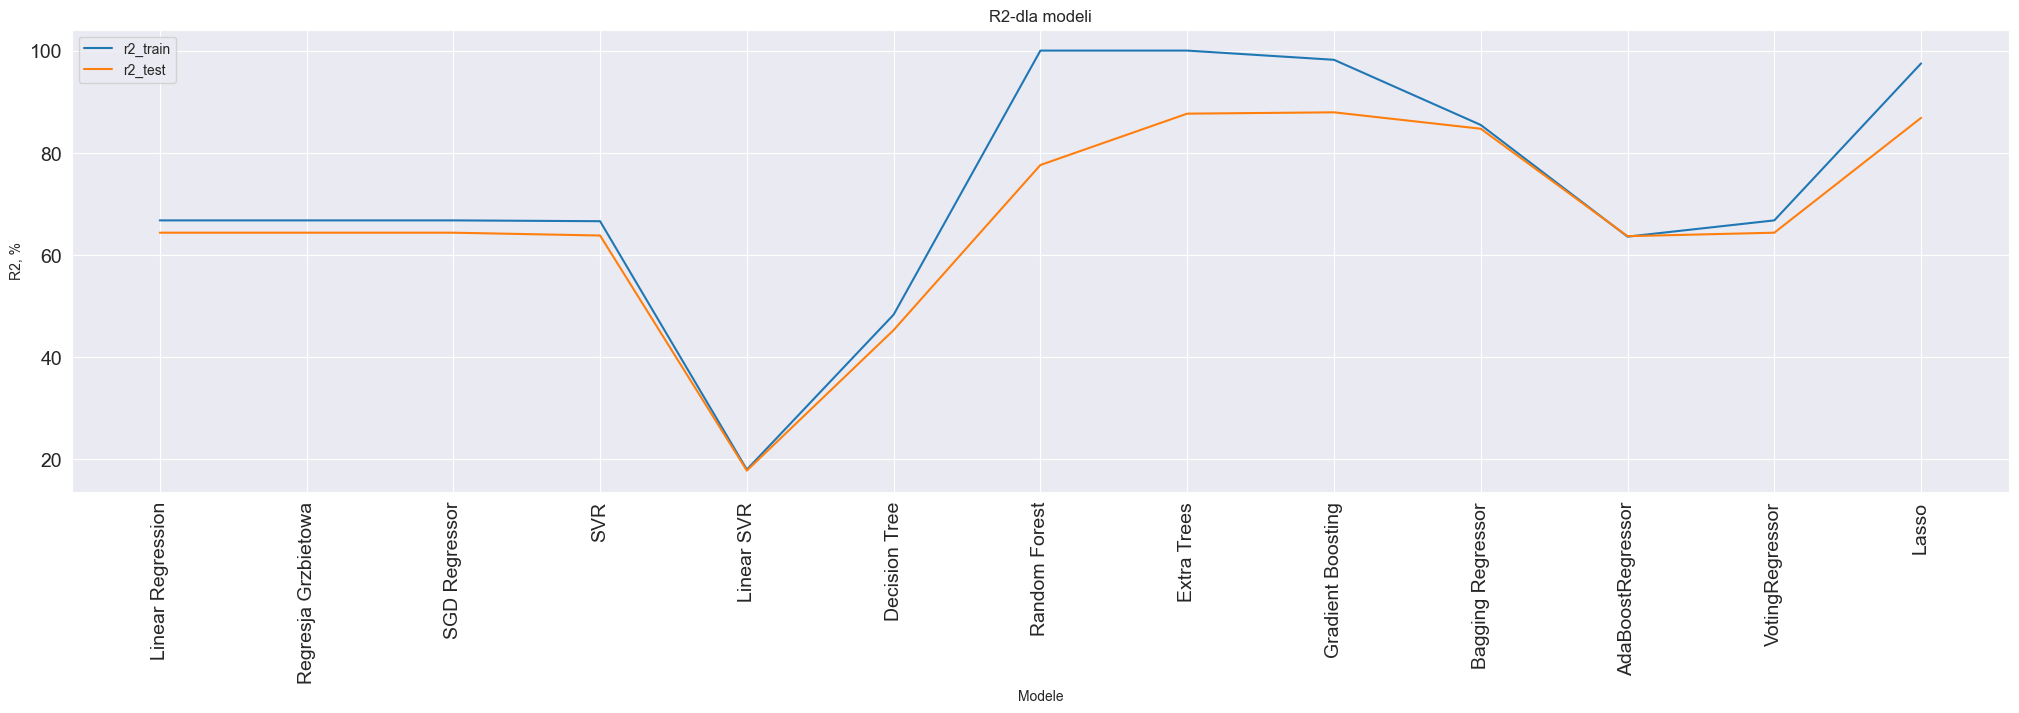

In [123]:
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['r2_train'], label = 'r2_train')
plt.plot(xx, models['r2_test'], label = 'r2_test')
plt.legend()
plt.title('R2-dla modeli')
plt.xlabel('Modele')
plt.ylabel('R2, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

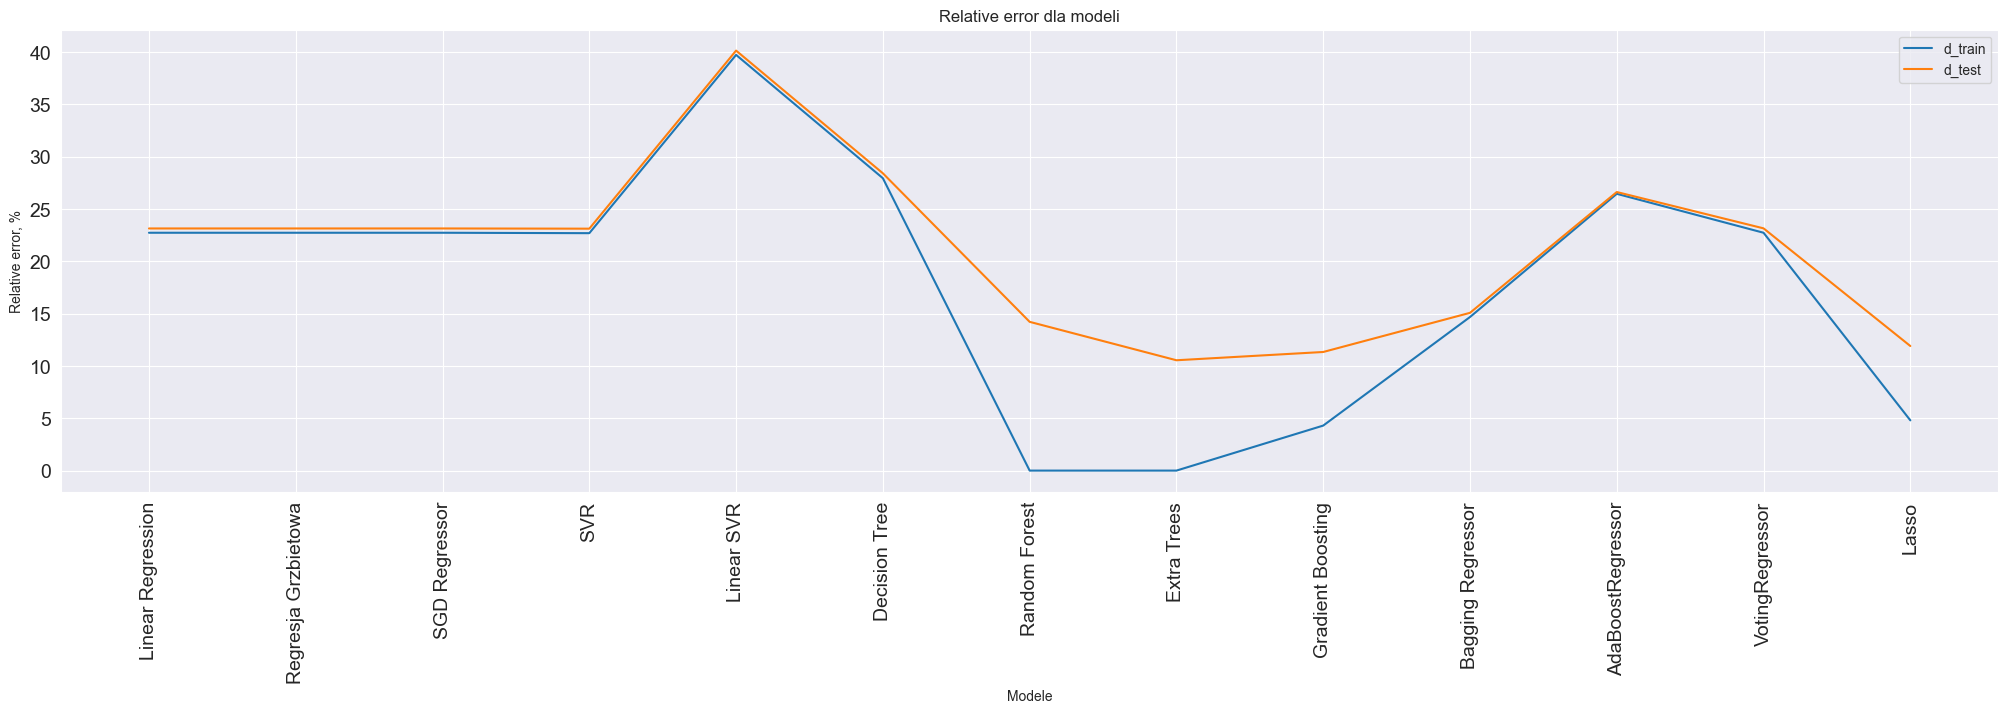

In [124]:
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['d_train'], label = 'd_train')
plt.plot(xx, models['d_test'], label = 'd_test')
plt.legend()
plt.title('Relative error dla modeli')
plt.xlabel('Modele')
plt.ylabel('Relative error, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

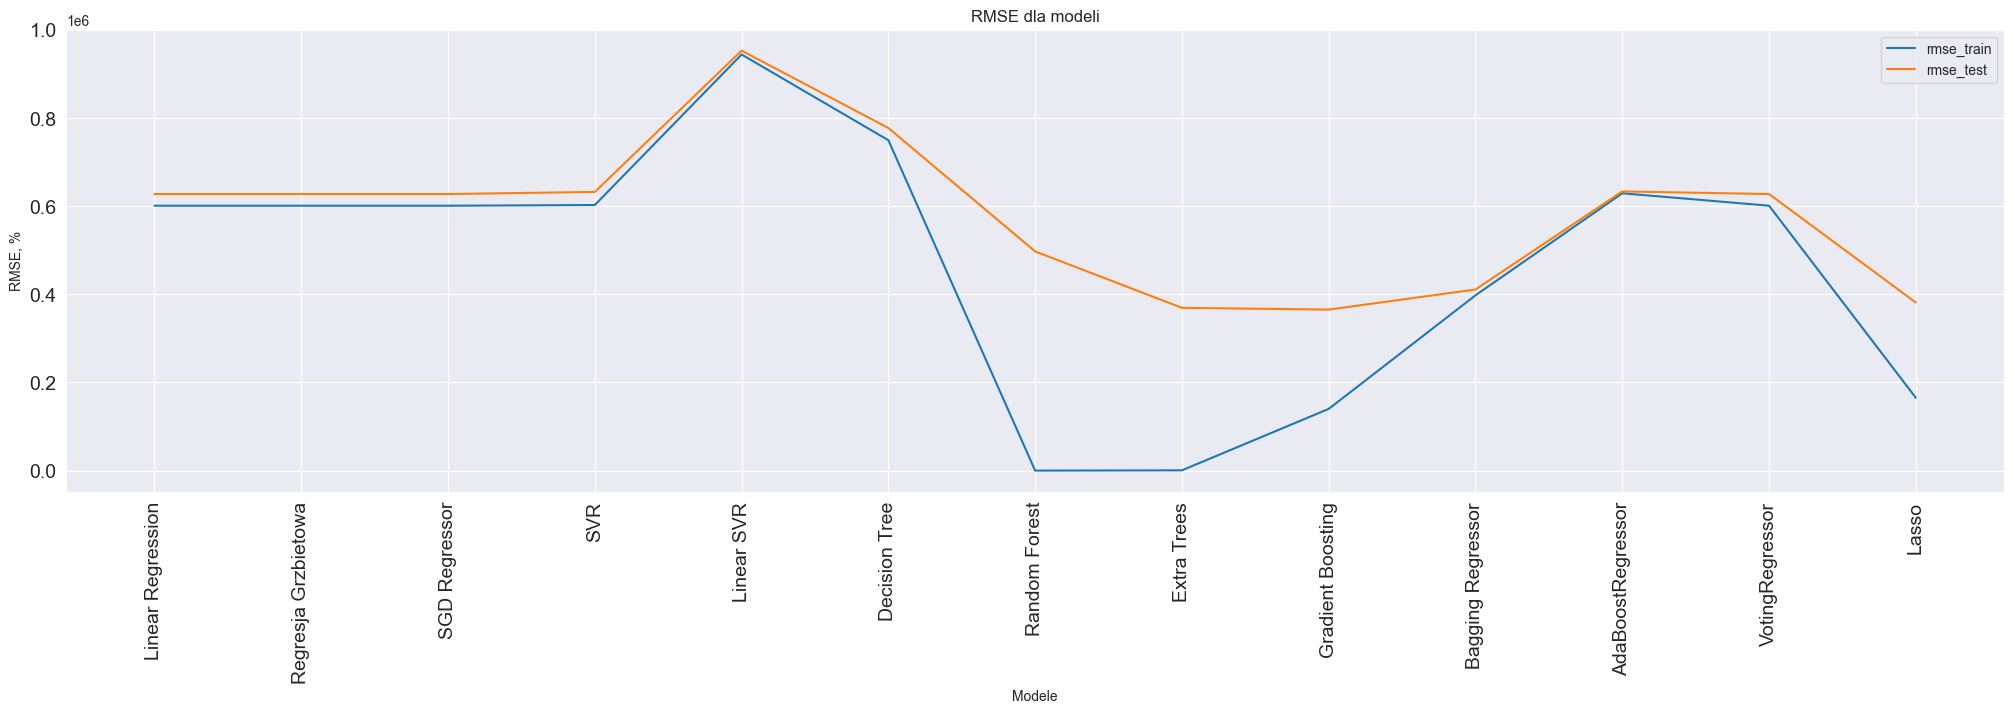

In [125]:
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['rmse_train'], label = 'rmse_train')
plt.plot(xx, models['rmse_test'], label = 'rmse_test')
plt.legend()
plt.title('RMSE dla modeli')
plt.xlabel('Modele')
plt.ylabel('RMSE, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()